In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from google.cloud import bigquery
from google.cloud import bigquery
from google.oauth2 import service_account
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Set up your service account credentials
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.getenv('GOOGLE_APPLICATION_CREDENTIALS')
cred_path = os.getenv('GOOGLE_APPLICATION_CREDENTIALS')
concatenated_string = f"{cred_path}"
credentials=service_account.Credentials.from_service_account_file(concatenated_string)
# Initialize the BigQuery client
client = bigquery.Client(credentials=credentials, project=credentials.project_id)
# client = bigquery.Client(credentials=os.getenv('GOOGLE_APPLICATION_CREDENTIALS'), project=)

# Query data from BigQuery
query = """
SELECT 
  timestamp,
  temperature,
  pressure,
  humidity,
  wind_speed
FROM `weather-analysis-426912.weather_dataset.weather_analysis`
ORDER BY timestamp
"""
df = client.query(query).to_dataframe()


/Users/judieu/Documents/Pipelines/Weather_Analysis_1/env/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


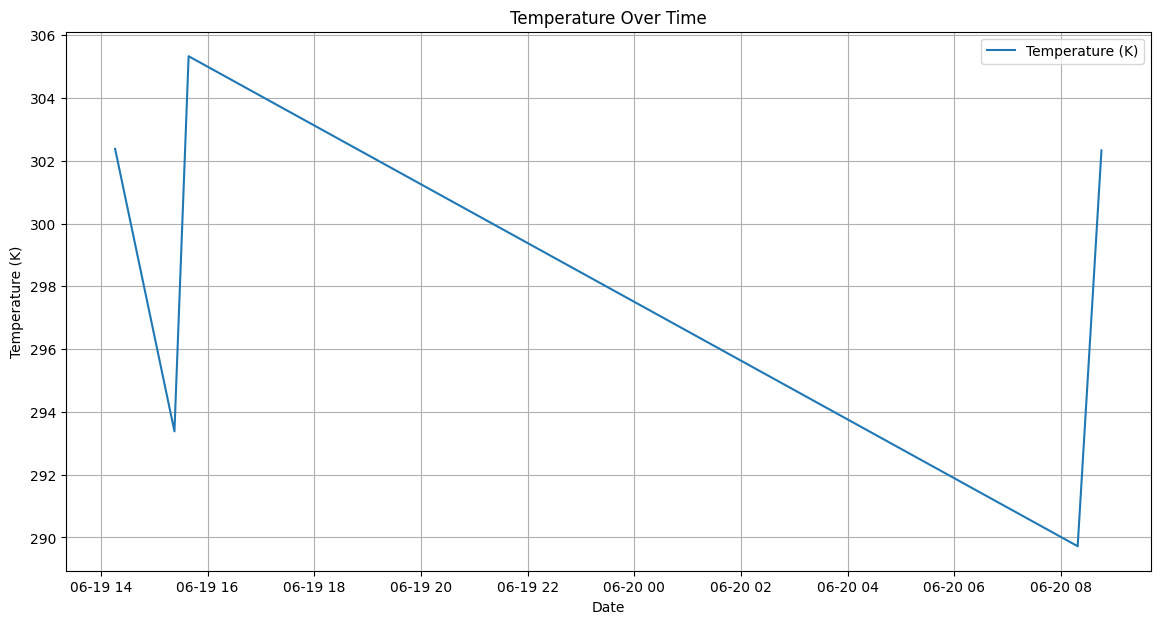

In [2]:

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Plot temperature over time
plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['temperature'], label='Temperature (K)', color='tab:blue')
plt.xlabel('Date')
plt.ylabel('Temperature (K)')
plt.title('Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()


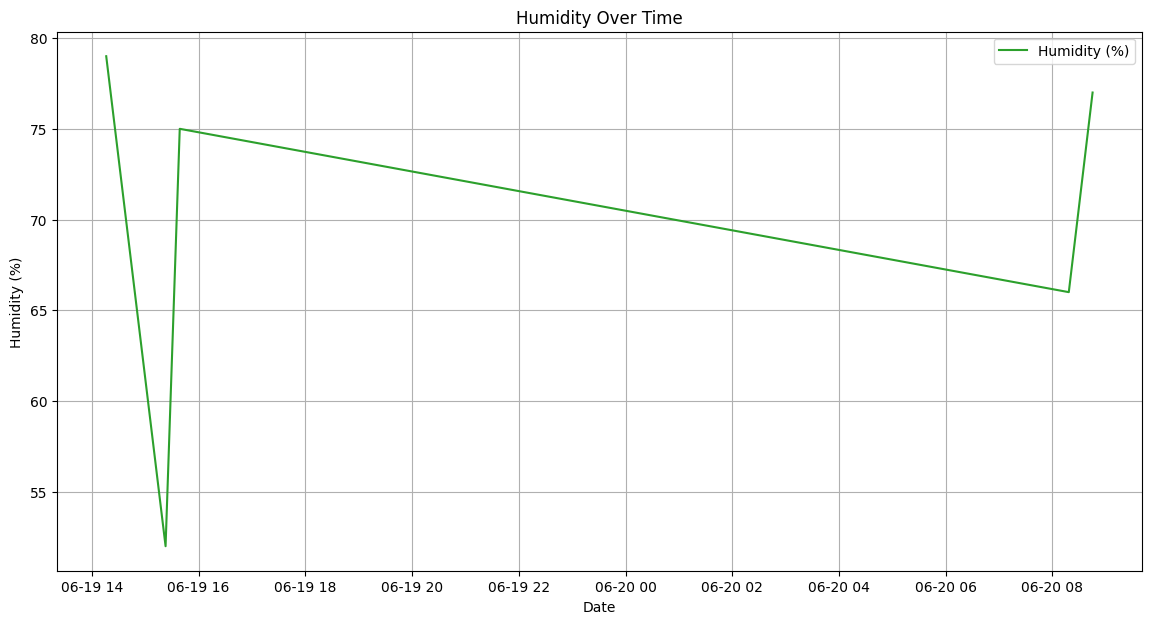

In [3]:

# Plot humidity over time
plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['humidity'], label='Humidity (%)', color='tab:green')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Humidity Over Time')
plt.legend()
plt.grid(True)
plt.show()
